In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv


In [2]:
master_data=pd.read_csv('../input/suicide-rates-overview-1985-to-2016/master.csv')
master_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
master_data.shape

(27820, 12)

In [4]:
master_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [5]:
master_data['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

Text(0.5, 1.0, 'Country')

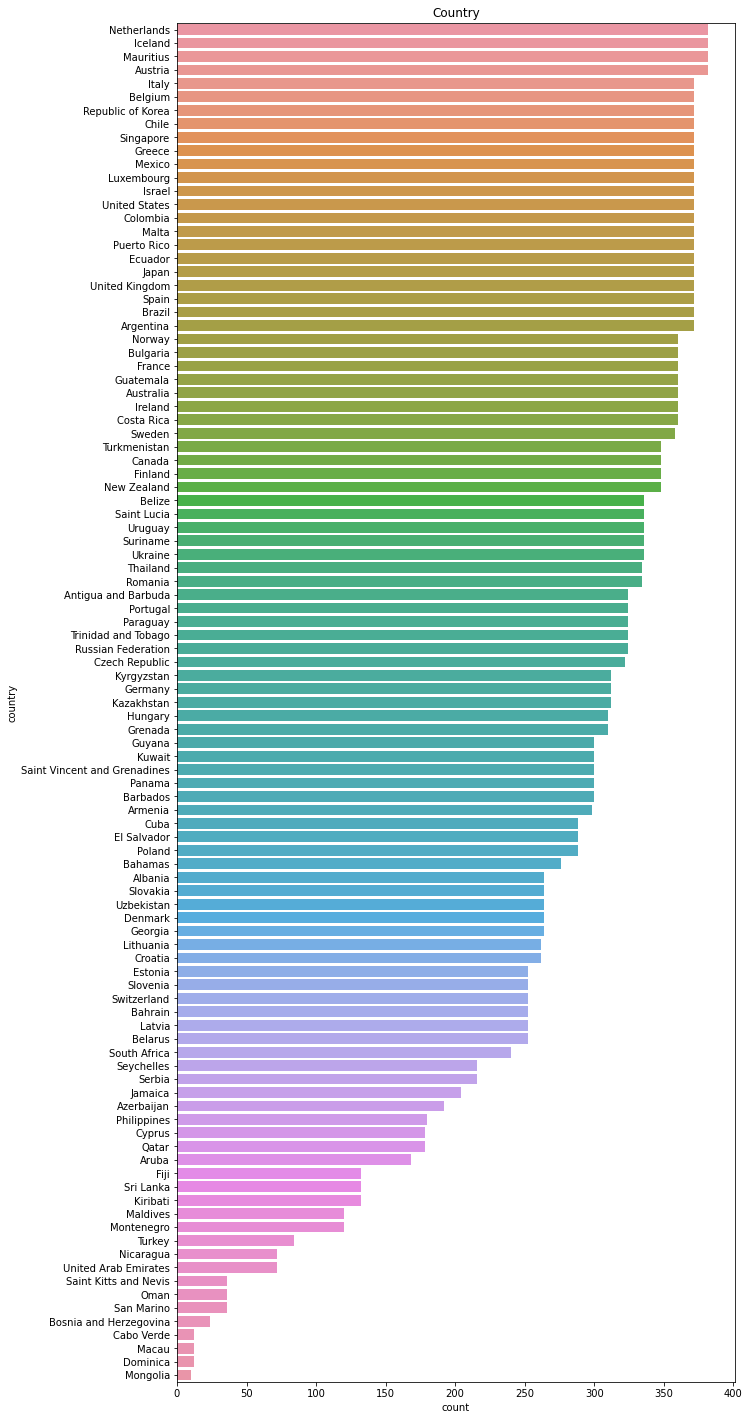

In [6]:
fig = plt.figure(figsize=(10,25))
sns.countplot(y=master_data['country'], order =master_data['country'].value_counts().index)
plt.title("Country")

Text(0.5, 1.0, '# of Suicide by Age and Sex ')

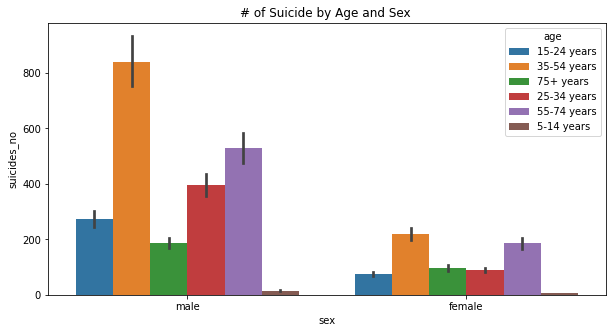

In [7]:
fig = plt.figure(figsize=(10,5))
sns.barplot(x = master_data['sex'], y = master_data['suicides_no'], hue = master_data['age'])
plt.title("# of Suicide by Age and Sex ")

Text(0.5, 1.0, '# of Suicide by generation and sex ')

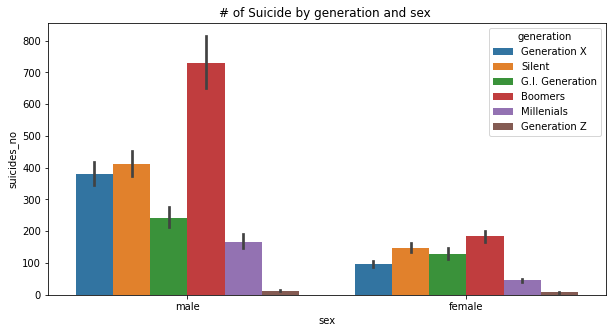

In [8]:
fig= plt.figure(figsize=(10,5))
sns.barplot(x = master_data['sex'], y = master_data['suicides_no'], hue = master_data['generation'])
plt.title("# of Suicide by generation and sex ")

<AxesSubplot:xlabel='sex', ylabel='count'>

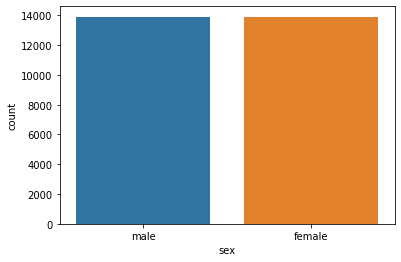

In [9]:
sns.countplot(master_data['sex'])

In [10]:
top_suicide=master_data[['country','suicides/100k pop']].sort_values(by='suicides/100k pop', ascending=False)
top_suicide

,country,suicides/100k pop
1258,Aruba,224.97
22280,Seychelles,204.92
24332,Suriname,187.06
20542,Republic of Korea,185.37
20530,Republic of Korea,182.32
...,...,...
3076,Barbados,0.00
3077,Barbados,0.00
3078,Barbados,0.00
3079,Barbados,0.00


<AxesSubplot:xlabel='suicides/100k pop', ylabel='country'>

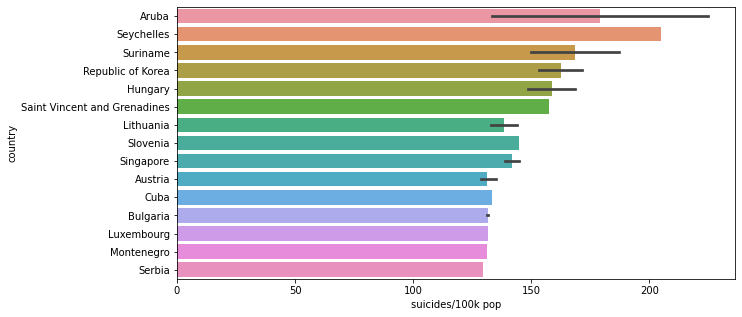

In [11]:
fig = plt.figure(figsize=(10,5))
sns.barplot(y= 'country', x= 'suicides/100k pop', data=top_suicide[:50])

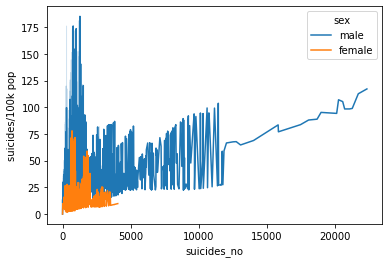

In [12]:
sns.lineplot(x="suicides_no", y="suicides/100k pop",
             hue="sex",data=master_data.sort_values(by='suicides/100k pop',ascending=False))
plt.show()

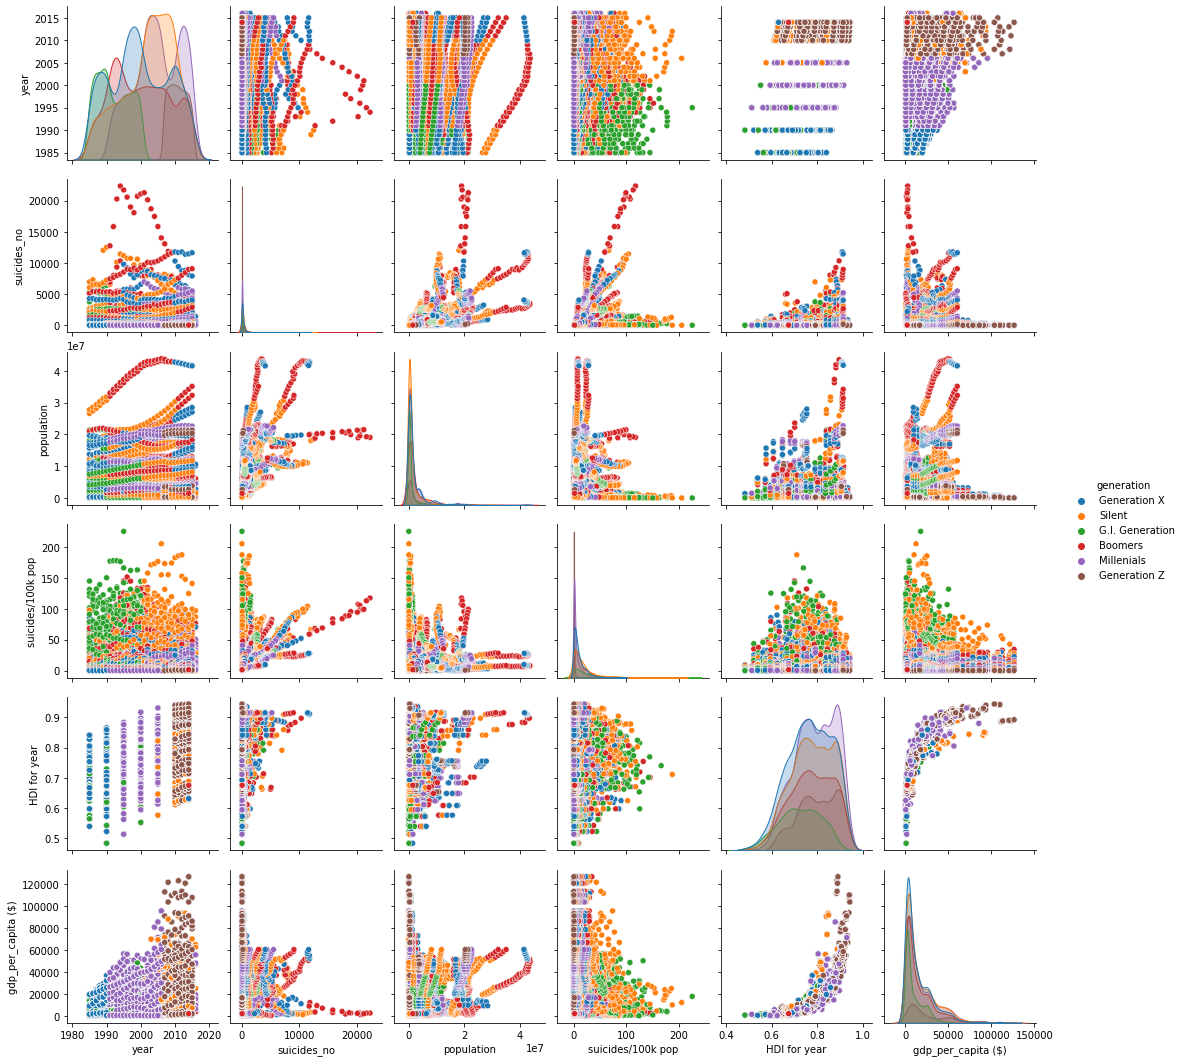

In [13]:
sns.pairplot(master_data,hue='generation')
plt.show()

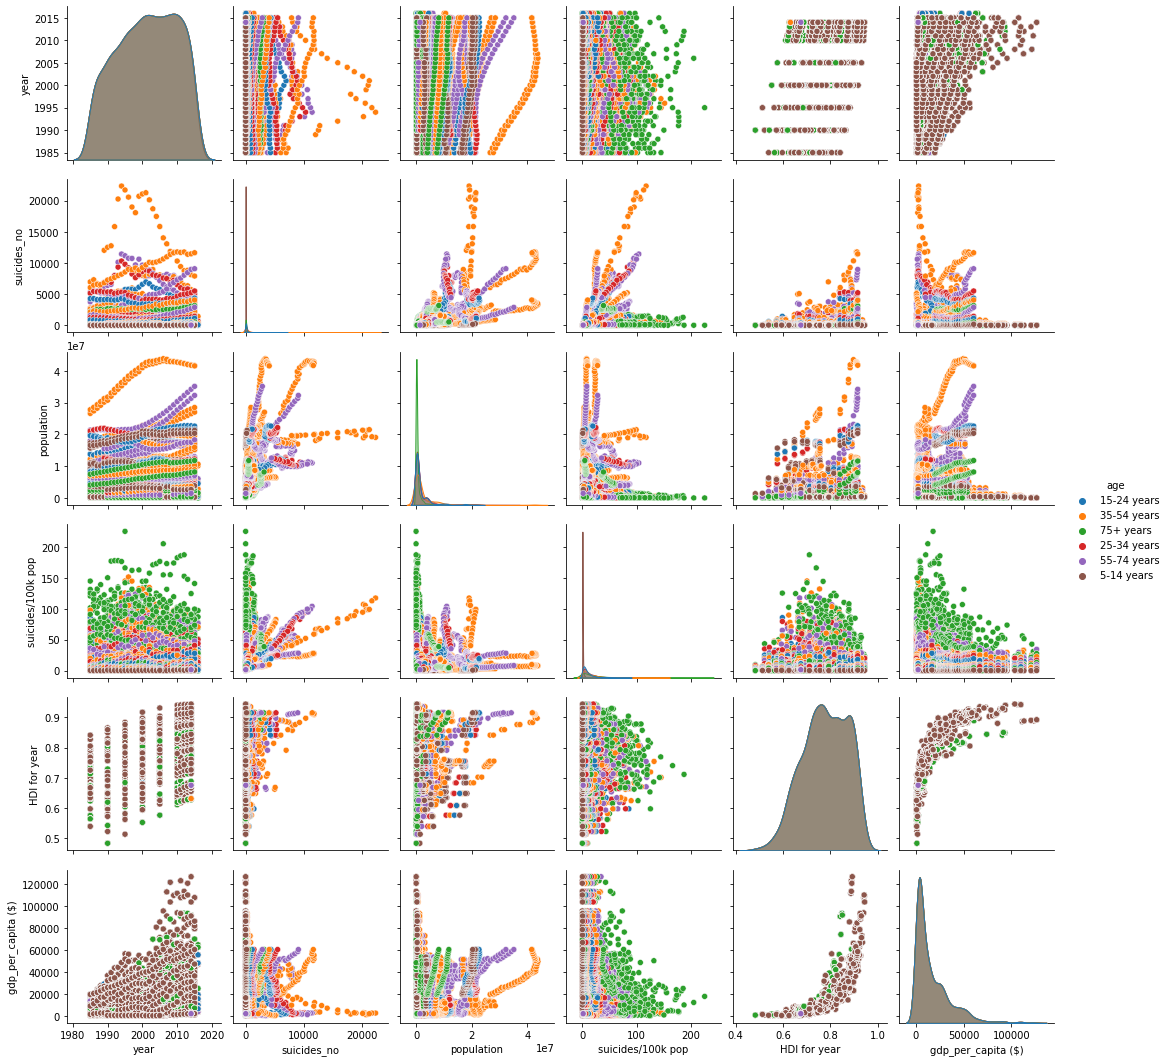

In [14]:
sns.pairplot(master_data,hue='age')
plt.show()

In [15]:
master_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [16]:
suicide_mean= master_data['suicides/100k pop'].mean()
suicide_mean

12.816097411933894

In [17]:
suicide_mean_data=[]
year=[]
for i in range(len(master_data['year'].unique())-1):
    year.append(master_data['year'].unique()[i])
    suicide_mean_data.append(master_data[master_data['year']==master_data['year'].unique()[i]]['suicides/100k pop'].mean())

Text(0.5, 1.0, 'Worldwide Suicides by year')

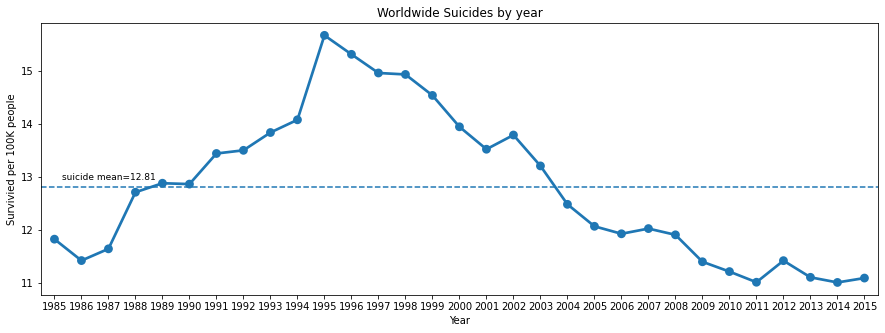

In [18]:
fig = plt.figure(figsize=(15,5))
sns.pointplot(x=year, y=suicide_mean_data)
plt.axhline(y=suicide_mean,linestyle='--')
plt.text(2, 13, 'suicide mean=12.81', fontsize=9, va='center', ha='center')
plt.ylabel("Survivied per 100K people")
plt.xlabel("Year")
plt.title("Worldwide Suicides by year")

In [19]:
suicide_sex= master_data[['sex', 'suicides/100k pop']].groupby(['sex'], as_index=False).mean()
suicide_sex

,sex,suicides/100k pop
0,female,5.392866
1,male,20.239329


Text(0.5, 1.0, 'Worldwide suicides by Gender')

<Figure size 720x360 with 0 Axes>

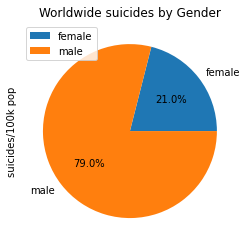

In [20]:
fig = plt.figure(figsize=(10,5))
labels = 'female','male'
suicide_sex.plot(kind='pie',labels=labels, y = 'suicides/100k pop', autopct='%1.1f%%')
plt.title('Worldwide suicides by Gender')

In [21]:
suicide_age= master_data[['age', 'suicides/100k pop']].groupby(['age'], as_index=False).mean()
suicide_age

,age,suicides/100k pop
0,15-24 years,8.947154
1,25-34 years,12.186885
2,35-54 years,14.947441
3,5-14 years,0.620041
4,55-74 years,16.155579
5,75+ years,23.955409


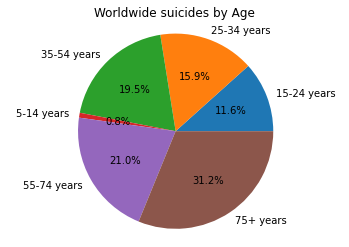

In [22]:
fig1, ax1 = plt.subplots()
plt.pie(suicide_age['suicides/100k pop'], labels=suicide_age['age'], autopct='%1.1f%%')
plt.title('Worldwide suicides by Age')
plt.axis('equal')
plt.show()

In [23]:
suicide_generation= master_data[['generation', 'suicides/100k pop']].groupby(['generation'], as_index=False).mean()
suicide_generation

,generation,suicides/100k pop
0,Boomers,14.742094
1,G.I. Generation,23.946378
2,Generation X,10.556874
3,Generation Z,0.642299
4,Millenials,5.383597
5,Silent,18.418848


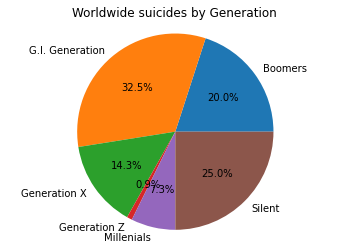

In [24]:
fig1, ax1 = plt.subplots()
plt.pie(suicide_generation['suicides/100k pop'], labels=suicide_generation['generation'], autopct='%1.1f%%')
plt.title('Worldwide suicides by Generation')
plt.axis('equal')
plt.show()

In [25]:
master_data

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
